In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras import *


In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import PIL
import cv2
import pathlib
import pandas as pd
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from sklearn.metrics import *
import seaborn as sns

In [9]:
#Give the path of cancer_images present inside OralCancer folder
cancer_images_list = os.listdir(r"C:\Users\ajayk\Downloads\finalyear Project\Oral Cancer Detection\OralCancer\cancer")

In [11]:
#Give the path of non_cancer_images present inside OralCancer folder
non_cancer_images_list=os.listdir(r"C:\Users\ajayk\Downloads\finalyear Project\Oral Cancer Detection\OralCancer\non-cancer")

In [13]:
cancer_images = []
cancer_labels = []

for image_path in cancer_images_list:
    
    img = cv2.imread(str("C:\\Users\\ajayk\\Downloads\\finalyear Project\\Oral Cancer Detection\\OralCancer\\cancer" + '\\' + image_path),cv2.COLOR_BGR2RGB)
   # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(250,250))
    
    cancer_images.append(img)
    cancer_labels.append(1)

non_cancer_images = []
non_cancer_labels = []

for image_path in non_cancer_images_list:
    
    img = cv2.imread(str("C:\\Users\\ajayk\\Downloads\\finalyear Project\\Oral Cancer Detection\\OralCancer\\non-cancer" + '\\' + image_path),cv2.COLOR_BGR2RGB)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(250,250))
    
    non_cancer_images.append(img)
    non_cancer_labels.append(0)

In [15]:
cancer_images[0].shape

(250, 250, 3)

In [17]:
len(cancer_images),len(non_cancer_images)

(87, 44)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, save_img

# cancer_folder = "C:\\Users\\datma003\\Desktop\\projects1\\New\\Oral Cancer Detection\\OralCancer\\cancer"
# augmented_cancer_images_dir = 'augmented_cancer_images'
# os.makedirs(augmented_cancer_images_dir, exist_ok=True)

# # Image augmentation 
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# gen_cancer_images = os.listdir(cancer_folder)
# num_augmented_images = 200
# num_generated_images = 1

# # Generate augmented images
# for filename in gen_cancer_images:
#     img_path = os.path.join(cancer_folder, filename)
    

#     img_bgr = cv2.imread(img_path)
#     img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#     img_rgb = cv2.resize(img_rgb, (250, 250))
    

#     x = img_to_array(img_rgb)
#     x = x.reshape((1,) + x.shape)


#     i = 0
#     for batch in datagen.flow(x, batch_size=1,
#                               save_to_dir=augmented_cancer_images_dir, 
#                               save_prefix='augmented', 
#                               save_format='jpg'):
#         num_generated_images += 1
#         i += 1
#         if i >= num_augmented_images / len(gen_cancer_images):
#             break
#     if num_generated_images >= num_augmented_images:
#         break

# print(f"{num_generated_images} augmented images generated in total.")

In [21]:
# non_cancer_folder = "C:\\Users\\datma003\\Desktop\\projects1\\New\\Oral Cancer Detection\\OralCancer\\non-cancer"
# augmented_non_cancer_images_dir = 'augmented_non_cancer_images'
# os.makedirs(augmented_non_cancer_images_dir, exist_ok=True)

# # Image augmentation setup
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# gen_non_cancer_images = os.listdir(non_cancer_folder)
# num_augmented_images = 200
# num_generated_images = 0

# # Generate augmented images
# for filename in gen_non_cancer_images:
#     img_path = os.path.join(non_cancer_folder, filename)
    
#     img_bgr = cv2.imread(img_path)
#     img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#     img_rgb = cv2.resize(img_rgb, (250, 250))
    

#     x = img_to_array(img_rgb)
#     x = x.reshape((1,) + x.shape)

    
#     i = 0
#     for batch in datagen.flow(x, batch_size=1,
#                               save_to_dir=augmented_non_cancer_images_dir, 
#                               save_prefix='augmented', 
#                               save_format='jpg'):
#         num_generated_images += 1
#         i += 1
#         if i >= num_augmented_images / len(gen_non_cancer_images):
#             break
#     if num_generated_images >= num_augmented_images:
#         break

# print(f"{num_generated_images} augmented images generated in total.")

In [23]:
# Two new folders augmented_cancer_images and augmented_non_cancer_images will be created. 
#Go to your file explorer and move all the augmented cancer images to data->cancer folder and augmented non_cancer images to data->non_cancer folder

In [25]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=70
CHANNELS=3

In [27]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\ajayk\\Downloads\\finalyear Project\\Oral Cancer Detection\\data",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 529 files belonging to 2 classes.


In [29]:
class_names = dataset.class_names
class_names

['cancer', 'non-cancer']

In [31]:
len(dataset)  ##9 batches of 32 images each

9

In [33]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[8.01953125e+01 8.82285156e+01 9.01289062e+01]
  [1.15498047e+02 1.24000000e+02 1.23199219e+02]
  [1.25312500e+02 1.28980469e+02 1.29316406e+02]
  ...
  [8.96718750e+01 8.75058594e+01 9.28378906e+01]
  [9.19003906e+01 8.71992188e+01 9.40000000e+01]
  [6.78300781e+01 5.70292969e+01 7.36972656e+01]]

 [[1.61528824e+02 1.70710602e+02 1.72085175e+02]
  [1.66483765e+02 1.75627869e+02 1.75820541e+02]
  [1.61542343e+02 1.66475235e+02 1.66227188e+02]
  ...
  [8.60550537e+01 8.34020004e+01 8.97080994e+01]
  [9.74539490e+01 9.26946030e+01 9.96117249e+01]
  [7.14503250e+01 6.06495438e+01 7.67529144e+01]]

 [[2.15278793e+02 2.26505356e+02 2.27495178e+02]
  [1.92990997e+02 2.03819122e+02 2.04412872e+02]
  [1.80756989e+02 1.87817535e+02 1.86948654e+02]
  ...
  [9.00197830e+01 8.64065018e+01 9.34065018e+01]
  [9.81862335e+01 9.33243713e+01 1.00324371e+02]
  [8.01123962e+01 6.96080780e+01 8.38269501e+01]]

 ...

 [[9.37752686e+01 8.21619873e+01 9.04022217e+01]
  [9.46794

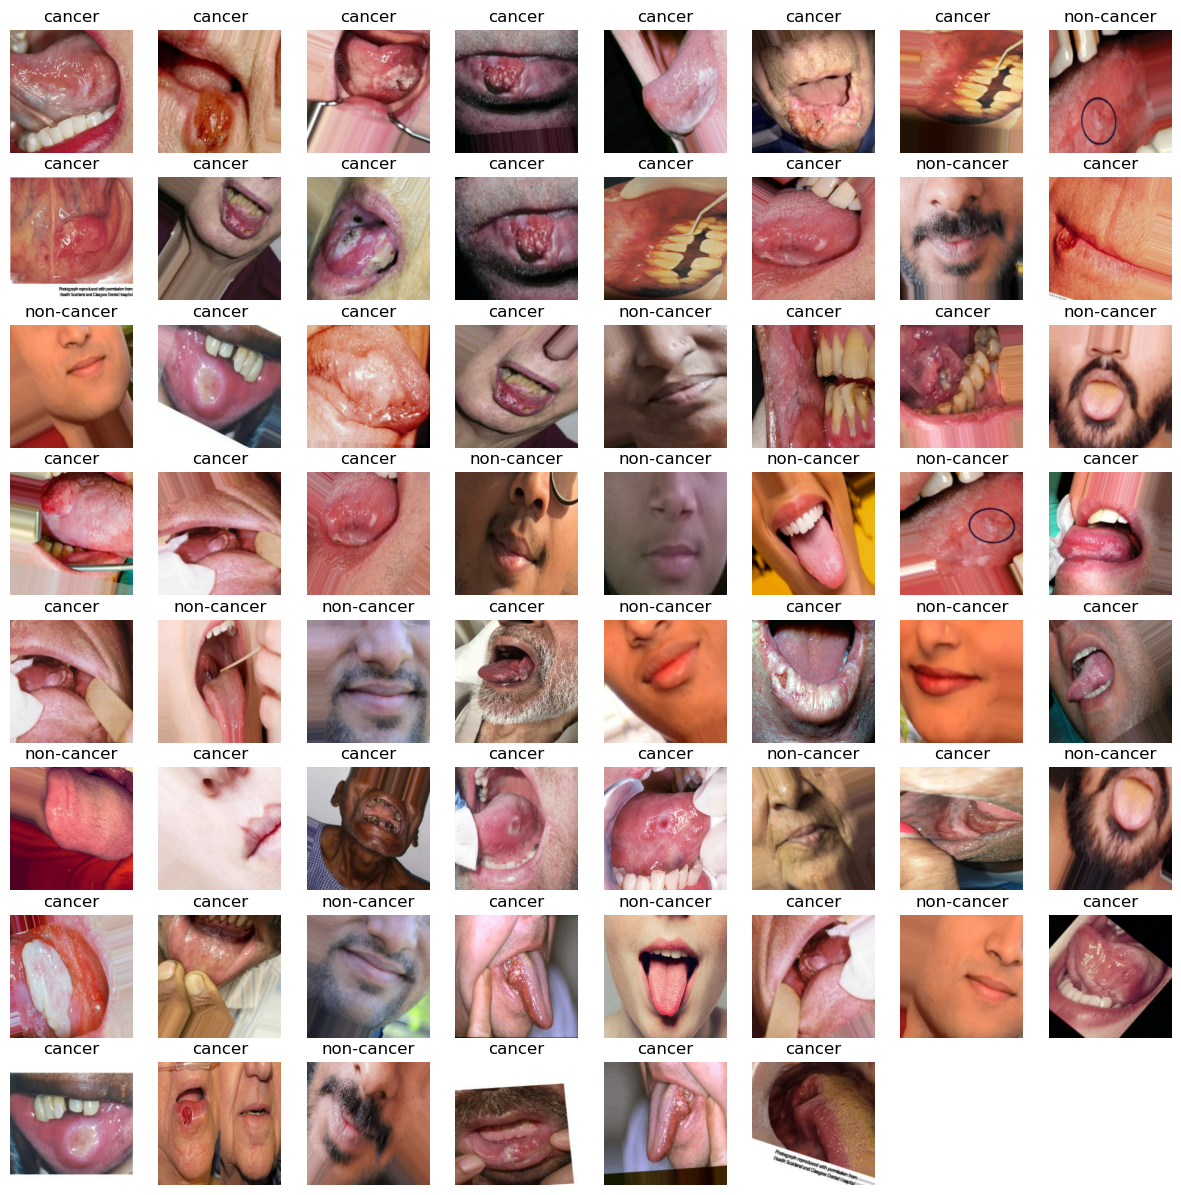

In [35]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [35]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [37]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [39]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255),
])


In [41]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])


In [43]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

C:\Users\ajayk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (62, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (62, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (62, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (62, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (62, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (62, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (62, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (62, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (62, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (62, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (62, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (62, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (62, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (62, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (62, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (62, 9)                │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,137 (719.29 KB)

 Trainable params: 184,137 (719.29 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3146 - loss: 1.8350
Epoch 2/70


C:\Users\ajayk\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5460 - loss: 0.7922
Epoch 3/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5197 - loss: 0.7016
Epoch 4/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5354 - loss: 0.6949
Epoch 5/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5917 - loss: 0.6769
Epoch 6/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5368 - loss: 0.6778
Epoch 7/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5565 - loss: 0.6695
Epoch 8/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5665 - loss: 0.6580
Epoch 9/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6101 - loss: 0.6532
Epoch 10/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6706 - loss: 0.6097
Epoch 11/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7477 - loss: 0.5724
Epoch 12/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6654 - loss: 0.5628
Epoch 13/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7051 - loss: 0.5489
Epoch 14/70
7/7 ━━━━━━━━━━━━━━━

In [51]:
model.evaluate(test_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step - accuracy: 0.9462 - loss: 0.1634


[0.20452147722244263, 0.9354838728904724]

In [53]:
acc = history.history['accuracy']
loss = history.history['loss']

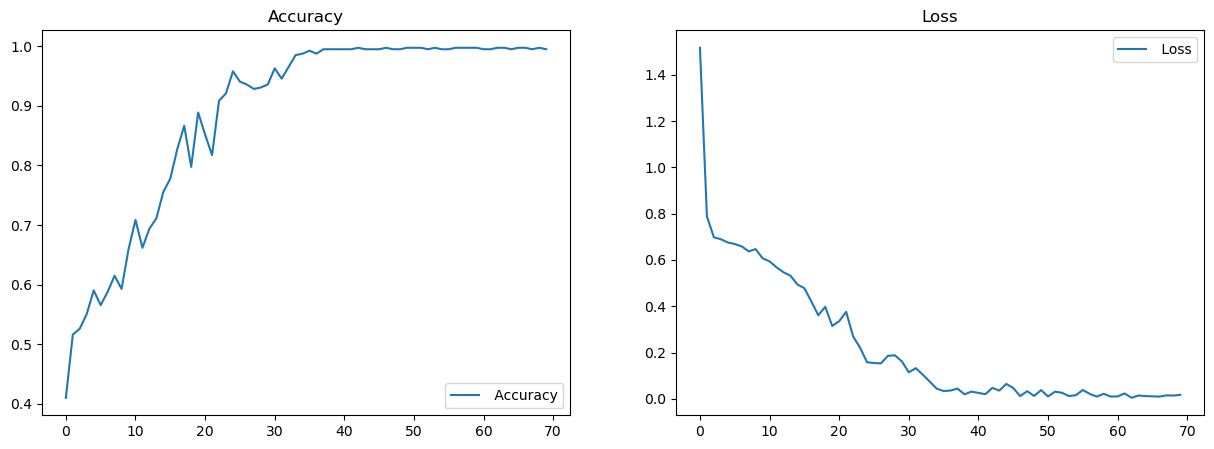

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

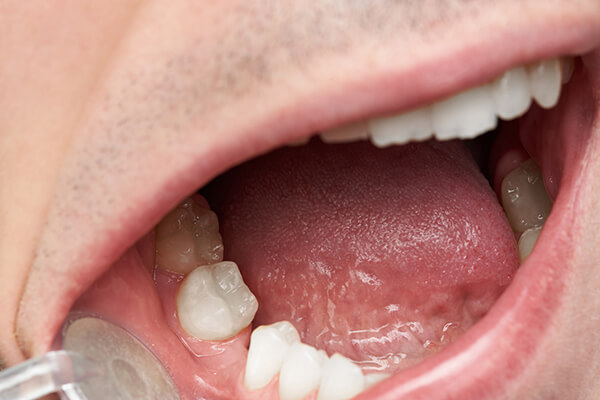

In [57]:
image_path = r"C:\Users\ajayk\Downloads\finalyear Project\Oral Cancer Detection\OralCancer\cancer\Oral-Cancer-Screenings.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [59]:
pred = model.predict(scaled_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [61]:
output = class_names[np.argmax(pred)]

In [63]:
output

'cancer'

In [65]:
model.save("Oral_Cancer_Detection_CNN.h5")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step


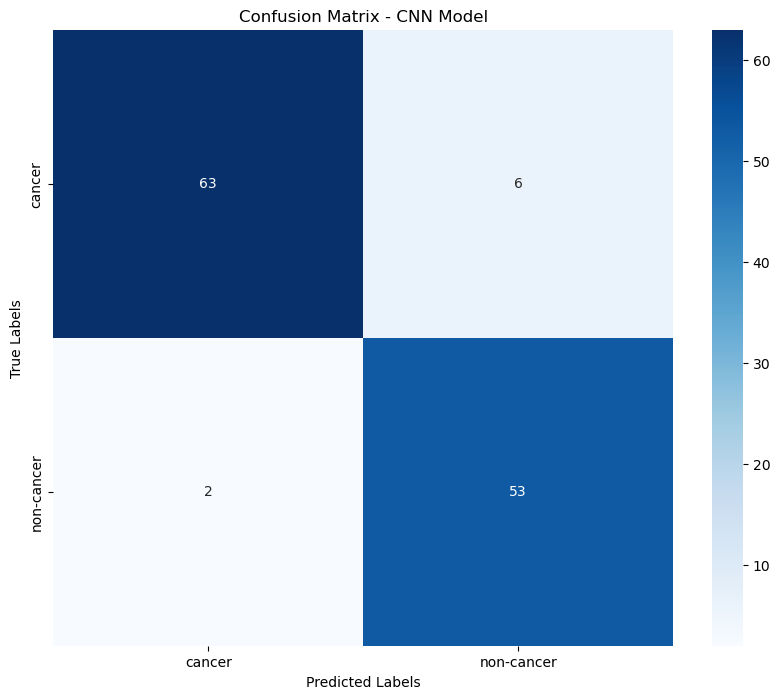

Classification Report - CNN Model:
              precision    recall  f1-score   support

      cancer       0.97      0.91      0.94        69
  non-cancer       0.90      0.96      0.93        55

    accuracy                           0.94       124
   macro avg       0.93      0.94      0.94       124
weighted avg       0.94      0.94      0.94       124



In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the CNN model
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - CNN Model')
plt.show()

# Print classification report
print("Classification Report - CNN Model:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

In [69]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dropout

In [71]:
vgg19_base = VGG19(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS),
                   include_top=False,  
                   weights='imagenet')

# Freeze the layers of VGG19 to prevent training
for layer in vgg19_base.layers:
    layer.trainable = False

In [73]:
# Create a new model on top of VGG19
model = Sequential([
    resize_and_rescale,  # Preprocessing layers
    vgg19_base,          # VGG19 base model
    Flatten(),
    Dense(128, activation='relu'),  # Custom dense layers
    Dropout(0.5),
    Dense(n_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (62, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (62, 8, 8, 512)        │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (62, 32768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (62, 128)              │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (62, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (62, 9)                │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,219,977 (92.39 MB)

 Trainable params: 4,195,593 (16.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [77]:
# Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=25,
)

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 117s 17s/step - accuracy: 0.3626 - loss: 3.0836
Epoch 2/25


C:\Users\ajayk\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 129s 18s/step - accuracy: 0.6393 - loss: 2.2565
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 168s 24s/step - accuracy: 0.7423 - loss: 0.9821
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 182s 26s/step - accuracy: 0.7957 - loss: 0.6275
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 215s 29s/step - accuracy: 0.8288 - loss: 0.4544
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 200s 29s/step - accuracy: 0.8851 - loss: 0.2551
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 184s 26s/step - accuracy: 0.8764 - loss: 0.3343
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 183s 26s/step - accuracy: 0.9255 - loss: 0.1887
Epoch 9/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 183s 26s/step - accuracy: 0.9371 - loss: 0.1525
Epoch 10/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 183s 26s/step - accuracy: 0.9513 - loss: 0.1243
Epoch 11/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 191s 27s/step - accuracy: 0.9649 - loss: 0.0973
Epoch 12/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 183s 26s/step - accuracy: 0.9691 - loss: 0.1013
Epoch 13/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 108s 16s/step - accuracy: 0.9699 - loss: 0.1207

In [79]:
# Evaluate the model
model.evaluate(test_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 26s 13s/step - accuracy: 0.9570 - loss: 0.0958


[0.08518823236227036, 0.9596773982048035]

In [81]:
# Plot accuracy and loss
acc = history.history['accuracy']
loss = history.history['loss']

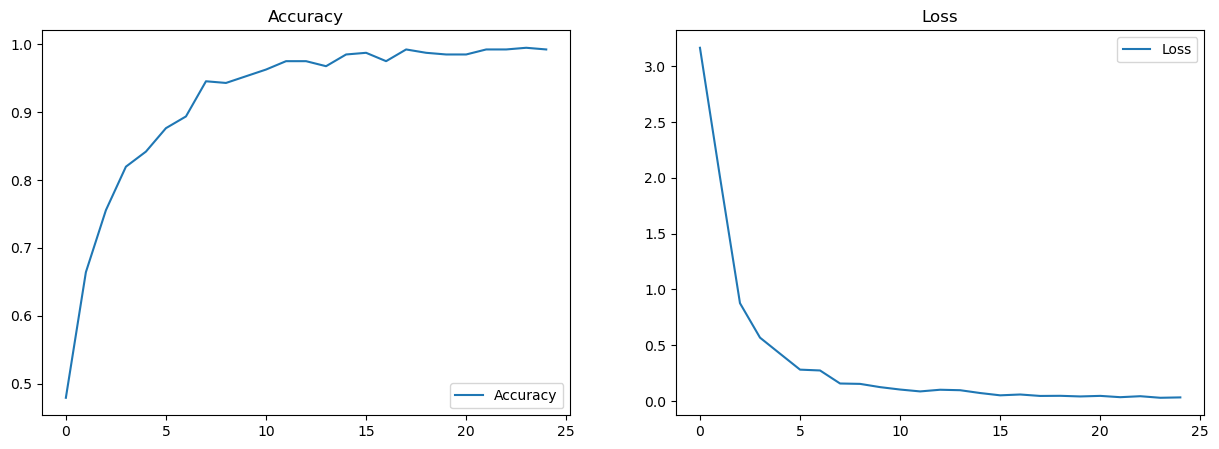

In [83]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(25), acc, label='Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(25), loss, label='Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


In [85]:
test_loss, test_accuracy = model.evaluate(test_ds)
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 16s/step - accuracy: 0.9570 - loss: 0.0958
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 22s/step


In [87]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))
accuracy = test_accuracy
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Classification Report:
              precision    recall  f1-score   support

      cancer       1.00      0.93      0.96        69
  non-cancer       0.92      1.00      0.96        55

    accuracy                           0.96       124
   macro avg       0.96      0.96      0.96       124
weighted avg       0.96      0.96      0.96       124

Accuracy: 0.9596773982048035
Precision: 0.9630376344086021
Recall: 0.9596774193548387
F1 Score: 0.9597960539497411


In [89]:
model.save('Oral_Cancer_VGG19.h5')

In [91]:
model.save('Oral_Cancer_VGG19.keras')

In [93]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [95]:
resnet_model = ResNet50(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS),
                        include_top=False,
                        weights='imagenet')

resnet_model.trainable = False

resnet_model_full = models.Sequential([
    resnet_model,  # Base ResNet50 model
    layers.Flatten(),  # Flatten the output to 1D
    layers.Dense(128, activation='relu'),  # Dense layer
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    layers.Dense(n_classes, activation='softmax')  # Output layer with 'n_classes' neurons (for classification)
])

In [97]:
resnet_model_full.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [99]:
resnet_model_full.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,366,217 (153.98 MB)

 Trainable params: 16,778,505 (64.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [101]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

resnet_history = resnet_model_full.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

Epoch 1/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - accuracy: 0.5197 - loss: 13.8758
Epoch 2/70


C:\Users\ajayk\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
C:\Users\ajayk\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.8900 - loss: 5.3631
Epoch 3/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.9449 - loss: 1.5485
Epoch 4/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.9694 - loss: 1.0819
Epoch 5/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.9801 - loss: 0.2650
Epoch 6/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9900 - loss: 1.3867
Epoch 7/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9980 - loss: 0.0673
Epoch 8/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9915 - loss: 0.2118
Epoch 9/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9953 - loss: 0.1066
Epoch 10/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9960 - loss: 0.0311
Epoch 11/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.9837 - loss: 0.6761
Epoch 12/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.9929 - loss: 0.1483
Epoch 13/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.9887 - loss: 0.1105
Epoch 14/70
7/7 ━━━━━━━

In [103]:
resnet_test_loss, resnet_test_accuracy = resnet_model_full.evaluate(test_ds)

print(f"Test Accuracy of ResNet Model: {resnet_test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.9785 - loss: 0.5120
Test Accuracy of ResNet Model: 97.58%


Text(0.5, 1.0, 'Training Loss (ResNet)')

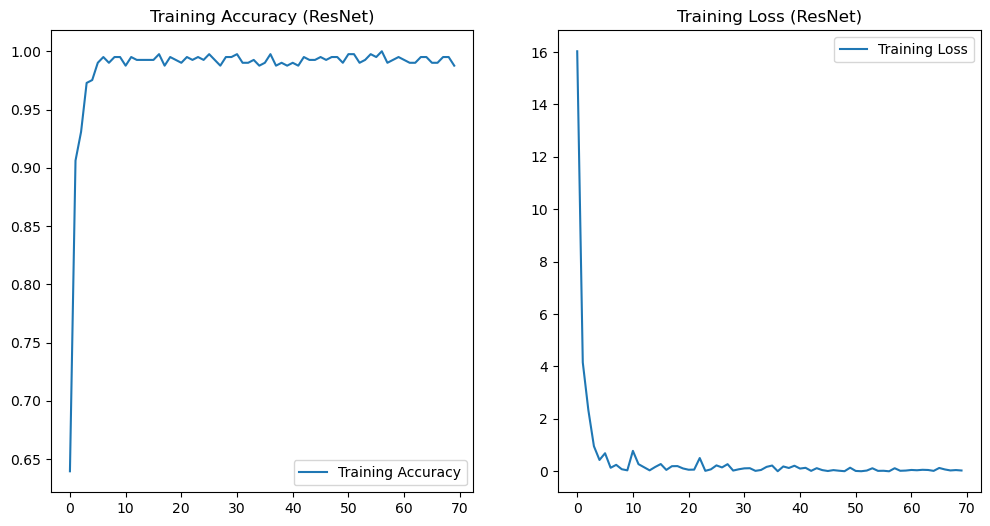

In [106]:
resnet_acc = resnet_history.history['accuracy']
resnet_loss = resnet_history.history['loss']

epochs_range = range(len(resnet_acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, resnet_acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy (ResNet)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, resnet_loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss (ResNet)')

In [108]:
resnet_predictions = resnet_model_full.predict(test_ds)
resnet_pred_classes = np.argmax(resnet_predictions, axis=1)
true_labels = np.concatenate([y for x, y in test_ds], axis=0)

class_report = classification_report(true_labels, resnet_pred_classes, target_names=class_names)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
Confusion Matrix:
 [[63  6]
 [ 2 53]]

Classification Report:
               precision    recall  f1-score   support

      cancer       0.99      0.97      0.98        69
  non-cancer       0.96      0.98      0.97        55

    accuracy                           0.98       124
   macro avg       0.97      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124



In [110]:
model.save("resnet_model_full.h5")

In [112]:
model.save("resnet_model_full.keras")

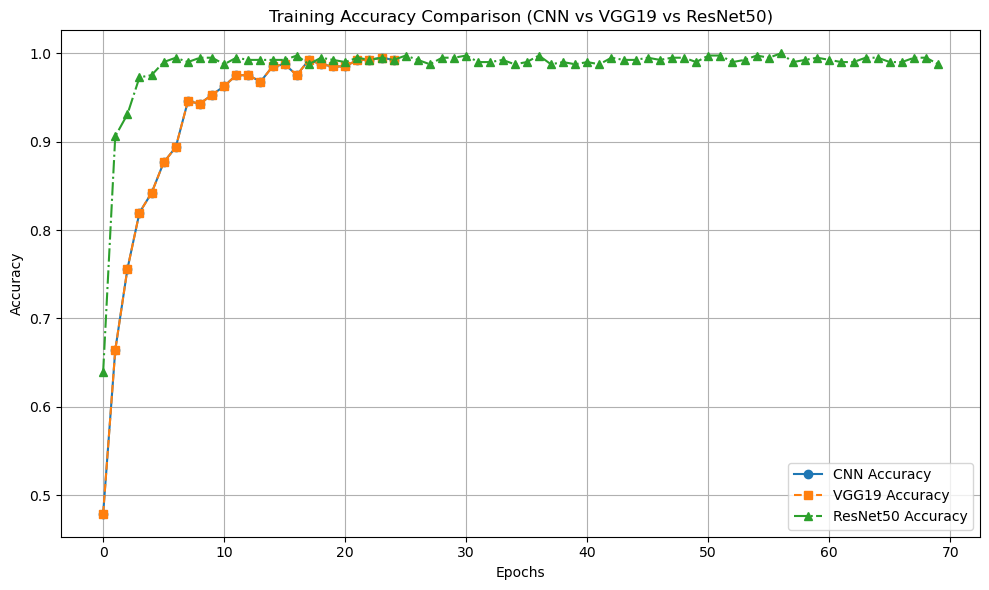

In [114]:
# Extract accuracies using your defined variables
cnn_acc = acc  # From CNN training
vgg_acc = history.history['accuracy']  # From VGG19 training
resnet_acc = resnet_history.history['accuracy']  # From ResNet50 training

# Define epochs for each model
cnn_epochs = range(len(cnn_acc))
vgg_epochs = range(len(vgg_acc))
resnet_epochs = range(len(resnet_acc))

# Plotting all accuracies together
plt.figure(figsize=(10, 6))
plt.plot(cnn_epochs, cnn_acc, label='CNN Accuracy', linestyle='-', marker='o')
plt.plot(vgg_epochs, vgg_acc, label='VGG19 Accuracy', linestyle='--', marker='s')
plt.plot(resnet_epochs, resnet_acc, label='ResNet50 Accuracy', linestyle='-.', marker='^')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Comparison (CNN vs VGG19 vs ResNet50)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()